In [31]:
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
# Modulos especificos para arboles de decision
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
# Modulos utiles para evaluar el modelo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score # Para hacer cross-validation y evaluar el modelo

# Regresión lineal multivariable
Veamos el caso de la regresion lineal usando dos variables
independientes: el precio por unidad y el gasto de publicidad para
predecir las ventas.
<br>
Creamos un nuevo vector de data con el gasto publicitario

In [32]:
gastoPublicitario = np.array([2000, 4801, 210, 10000, 6000, 503, 491, 4000, 9200, 1000, 1500, 1800, 3000])
# El vector de precios es
precio = np.array([24, 30, 43 , 101, 34, 94, 10, 15, 12, 44, 202, 156, 90])
#juntamos todos los precios con los correspondientes gastos publicitarios
X = np.column_stack((precio, gastoPublicitario))

Podemos pensar que cada punto (precio, gastoPublicitario) corresponde a
un producto (digamos, todas los modelos de zapatillas de Nike). Por ejemplo,
un punto (150, 300000) puede indicar que las Nike Air Force 1 cuestan 150
dolares y se invirtio un total de 300000 dolares en publicidad para esa
zapatilla en particular.

Creo nuevamente parametros artificiales para simular una relacion entre
las variables. Asumimos que al aumentar el precio habra un impacto negativo
en las ventas, pero al aumentar el gasto en publicidad veremos un impacto
positivo en las mismas.

In [33]:
beta = np.array([-0.3, 0.1])
beta0 = 20
#ventas = -0.3 * precio + 0.1 * gastoPublicitario + error
#   z   = -0.3 *   x    + 0.1 *          y        + 20

Vemos que hay una relacion negativa entre las ventas y el precio, y una
relacion positiva con el gasto publicitario.

Para cada valor de (precio, gasto publicitario), calculamos el valor de venta
correspondiente:

In [34]:
y_artif = np.dot(X, beta) + beta0

Una vez creados los datos artificales, le aÃ±ado un ruido normal para simular
que son datos del mundo real. Creo una nueva distribucion normal con media
0 y desviacion estandar 200

In [35]:
mu, sigma = 0, 200
distr = stats.norm(loc=mu, scale=sigma)
#creo una muestra de 13 trials para darle ruido a mis 13 puntos de (precio, gastos)
ruido = distr.rvs(13)

Sumo el ruido a la variable y_artif para simular datos reales

In [36]:
y = y_artif + ruido

Creacion de las matrices de entrenamiento y testeo. Dejaremos el 10% como testeo.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

Una vez creados los datos, instancio una regresion lineal y la entreno:

In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

Score del modelo en el conjunto de entrenamiento

In [39]:
score_in_train = reg.score(X_train, y_train)
#score del modelo en el conjunto de testeo
score_in_test = reg.score(X_test, y_test)
print(f"Score en conjunto de entrenamiento regresion lineal multivariable: {score_in_train}")
print(f"Score en conjunto de testeo regresion lineal multivariable: {score_in_test}")

Score en conjunto de entrenamiento regresion lineal multivariable: 0.8217220932421385
Score en conjunto de testeo regresion lineal multivariable: 0.7135139077736659


Vemos que estamos overfitteando. El problema se solucionara si agrego mas data

# Más data regresión lineal multivariable
Voy a utilizar una distribucion uniforma para obtener mas data, y hacer la regresion lineal multivariable
y luego el arbol de decision. Hopefully that'll solve the overfitting.
Creamos un nuevo vector de data con el gasto publicitario

El vector de gastos es de tamanio 1000 y va de 210 pesos a 10000 pesos

In [40]:
gastoPublicitario = np.random.randint(low=210, high=10000, size=1000)
#creo un vector random de precios de tamaÃ±o 1000 entre 10$ y 202$ 
precio = np.random.randint(low=10, high=202, size=1000)
#juntamos todos los precios con los correspondientes gastos publicitarios
X_new = np.column_stack((precio, gastoPublicitario))
#creo los valores artificiales a predecir
beta = np.array([-0.3, 0.1])
beta0 = 20
#para cada valor de (precio, gasto publicitario), calculamos el valor de venta
#correspondiente:
y_artif = np.dot(X_new, beta) + beta0
mu, sigma = 50, 10
distr = stats.norm(loc=mu, scale=sigma)
#creo una muestra de 1000 trials para darle ruido a mis 1000 puntos de (precio, gastos)
ruido = distr.rvs(X_new.shape[0])
#sumo el ruido a la variable y_artif para simular datos reales
y_new = y_artif + ruido
##print(y)

Creacion de las matrices de entrenamiento y testeo. Dejaremos el 10% como testeo.

In [41]:
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y_new, test_size=0.10)

Una vez creados los datos, instancio una regresion lineal y la entreno:

In [42]:
reg = LinearRegression()
reg.fit(X_new_train, y_new_train)
#Score del modelo en el conjunto de entrenamiento
score_in_train = reg.score(X_new_train, y_new_train)
#score del modelo en el conjunto de testeo
score_in_test = reg.score(X_new_test, y_new_test)
print(f"Score en conjunto de entrenamiento regresion lineal multivariable mas data: {score_in_train}")
print(f"Score en conjunto de testeo regresion lineal multivariable mas data: {score_in_test}")

Score en conjunto de entrenamiento regresion lineal multivariable mas data: 0.9986761773154446
Score en conjunto de testeo regresion lineal multivariable mas data: 0.9987167974773308



<br>
Con mas data se soluciona solo el problema del overfitteo en el modelo de regresion multivariable<br>
veamos si ocurre lo mismo en el modelo de arbol de decision:<br>


# Árbol de decisión 5 hojas
Clasifiquemos los dias lluviosos y no lluviosos con un arbol de decision
de 5 hojas primero. A los arboles no le importa mucho que el dataset este
desbalanceado, como es este caso.


Creamos el clasificador con un maximo de 5 hojas

In [43]:
dtr = DecisionTreeRegressor(max_leaf_nodes=6)

Entrenamiento del modelo usamos el mismo training set y test set que
con la regresion lineal multivariable sin data extra.

In [44]:
dtr.fit(X_train, y_train)
#score del modelo en el conjunto de entrenamiento
score_in_train = dtr.score(X_train, y_train)
#score del modelo en el conjunto de testeo
score_in_test = dtr.score(X_test, y_test)
print(f"Score en conjunto de entrenamiento arbol de decision 5 hojas: {score_in_train}")
print(f"Score en conjunto de testeo arbol de decision 5 hojas: {score_in_test}")

Score en conjunto de entrenamiento arbol de decision 5 hojas: 0.9751928944019649
Score en conjunto de testeo arbol de decision 5 hojas: 0.9511949645077892


Creamos la figura donde plotear el arbol con matplotlib

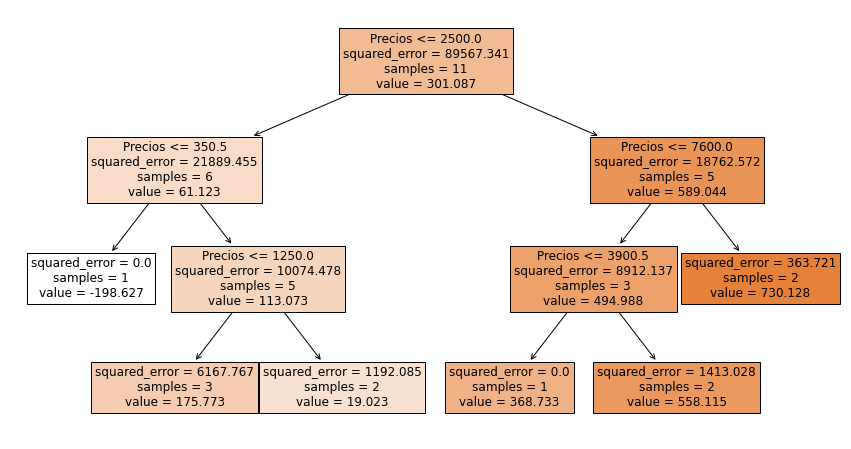

In [45]:
fig, ax = plt.subplots(figsize=(15, 8))
# Ploteamos el arbol
plot_tree(dtr, feature_names=["Gasto publicitario", "Precios"], fontsize=12, filled=True, ax=ax)
plt.show()

Overfitteo terriblemente mal, me dio score NEGATIVO en el test set...
El overfitting se va a arreglar solo cuando consiga mas data

# Más data Árbol de decisión 5 hojas
Vamos a instanciar un nuevo clasificador de árbol de decisión y lo entrenaremos con la data creada artificialmente para el ejemplo de la regresión lineal multivariable con más data.

Creamos el clasificador con un maximo de 5 hojas

In [46]:
dtr = DecisionTreeRegressor(max_leaf_nodes=5)
#entrenamiento del modelo
#usamos el mismo training set y test set que con la regresion lineal multivariable con mas data
dtr.fit(X_new_train, y_new_train)
#score del modelo en el conjunto de entrenamiento
score_in_train = dtr.score(X_new_train, y_new_train)
#score del modelo en el conjunto de testeo
score_in_test = dtr.score(X_new_test, y_new_test)
print(f"Score en conjunto de entrenamiento arbol de decision 5 hojas mas data: {score_in_train}")
print(f"Score en conjunto de testeo arbol de decision 5 hojas mas data: {score_in_test}")

Score en conjunto de entrenamiento arbol de decision 5 hojas mas data: 0.9459660492382119
Score en conjunto de testeo arbol de decision 5 hojas mas data: 0.9383024357573129


Creamos la figura donde plotear el arbol con matplotlib

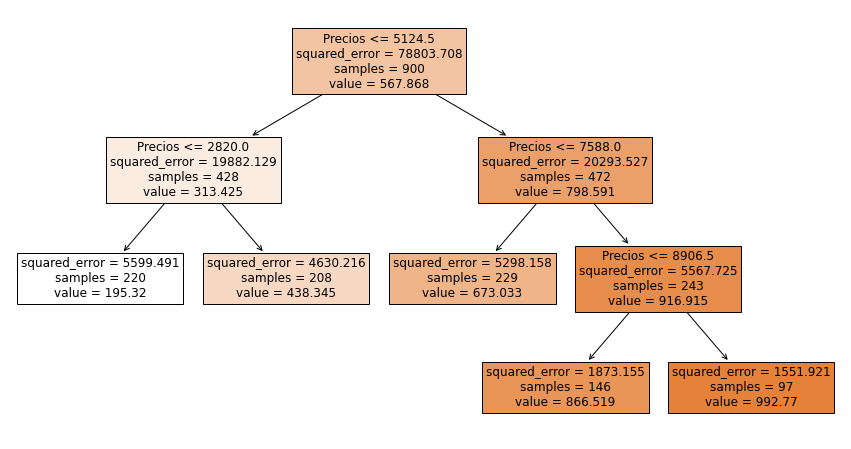

In [47]:
fig, ax = plt.subplots(figsize=(15, 8))
# Ploteamos el arbol
plot_tree(dtr, feature_names=["Gasto publicitario", "Precios"], fontsize=12, filled=True, ax=ax)
plt.show()


<br>
El problema del overfitting se soluciono solo ! Thanks more data.<br>
Veamos ahora como le va al arbol regularizado:<br>


# Árbol de decisión regularizado
Otro approach es penalizar la creacion de muchos nodos, y buscar el parametro
alpha que mejor ajuste a nuestra data. Este lo podemos estimar con
cross-validation:

Tomamos un valor alpha entre 10^-10 y 1. Usamos un barrido logaritmico

In [48]:
for alpha in np.logspace(-10, 0, 11):
    #creamos el modelo para un valor dado de alpha. En vez de dtc, le ponemos
    #dtr, porque el decition tree esta regularizado.
    dtr = DecisionTreeRegressor(ccp_alpha=alpha)
    #calculamos los scores al hacer cross-validation con 5 folds.
    #Esto es, partimos el dataset en bloques de 5, y entrenamos con
    #4 bloques y testeamos con uno. Asi las 5 combinaciones posibles, y
    #calculamos el score resultante cada vez:
    scores = cross_val_score(dtr, X_new_train, y_new_train, cv=5)
##    print(f"scores: {scores}")
    #imprimimos el valor de alpha y el score medio
    print(f"alpha: {alpha} - Score medio = {scores.mean()}")
"""   
Tomemos el valor de alpha donde el score sea maximo y veamos como le va al
modelo con el dataset de testeo:
"""
alpha = 0.01
#creamos el modelo para este valor de alpha
dtr = DecisionTreeRegressor(ccp_alpha=alpha)
#entrenamos el modelo
dtr.fit(X_new_train, y_new_train)
#score del modelo en el conjunto de entrenamiento
score_in_train = dtr.score(X_new_train, y_new_train)
#score del modelo en el conjunto de testeo
score_in_test = dtr.score(X_new_test, y_new_test)
print(f"Score en conjunto de entrenamiento arbol regularizado mas data: {score_in_train}")
print(f"Score en conjunto de testeo arbol regularizado mas data: {score_in_test}")

alpha: 1e-10 - Score medio = 0.9966663300076986
alpha: 1e-09 - Score medio = 0.9966536335038377
alpha: 1e-08 - Score medio = 0.9967335458298475
alpha: 1e-07 - Score medio = 0.9967630055028721
alpha: 1e-06 - Score medio = 0.996765855934781
alpha: 1e-05 - Score medio = 0.9966508868484902
alpha: 0.0001 - Score medio = 0.9965833888334
alpha: 0.001 - Score medio = 0.9965885377068382
alpha: 0.01 - Score medio = 0.9966210263612281
alpha: 0.1 - Score medio = 0.9966938104742649
alpha: 1.0 - Score medio = 0.9965531953733461
Score en conjunto de entrenamiento arbol regularizado mas data: 0.9999906032820063
Score en conjunto de testeo arbol regularizado mas data: 0.9967294855593233


El arbol regularizado tuvo mucho mejor performance que el arbol de 5 hojas ! <br>
Incluso supero a la regresion lineal.
Ahora, el random forest.

# Regresión Random Forest
Vamos a hacer un ensemble de 100 arboles de decision para crear el bosque.

Construccion del clasificador

In [49]:
rfr = RandomForestRegressor(n_estimators=100)
# Entrenamiento del modelo
rfr.fit(X_new_train, y_new_train)
#score del modelo en el conjunto de entrenamiento
score_in_train = rfr.score(X_new_train, y_new_train)
#score del modelo en el conjunto de testeo
score_in_test = rfr.score(X_new_test, y_new_test)
print(f"Score en conjunto de entrenamiento random forest mas data: {score_in_train}")
print(f"Score en conjunto de testeo random forest mas data: {score_in_test}")

Score en conjunto de entrenamiento random forest mas data: 0.9997332832263525
Score en conjunto de testeo random forest mas data: 0.9982200600618619


El random forest es apenas un poco mejor que el arbol regularizado, y esta en el mismo
nivel de score que la regresion lineal.